In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

In [85]:
pd.set_option('display.max_rows', 500)

# Assignment 4 - Hypothesis Testing
This assignment requires more individual learning than previous assignments - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

Definitions:
* A _quarter_ is a specific three month period, Q1 is January through March, Q2 is April through June, Q3 is July through September, Q4 is October through December.
* A _recession_ is defined as starting with two consecutive quarters of GDP decline, and ending with two consecutive quarters of GDP growth.
* A _recession bottom_ is the quarter within a recession which had the lowest GDP.
* A _university town_ is a city which has a high percentage of university students compared to the total population of the city.

**Hypothesis**: University towns have their mean housing prices less effected by recessions. Run a t-test to compare the ratio of the mean price of houses in university towns the quarter before the recession starts compared to the recession bottom. (`price_ratio=quarter_before_recession/recession_bottom`)

The following data files are available for this assignment:
* From the [Zillow research data site](http://www.zillow.com/research/data/) there is housing data for the United States. In particular the datafile for [all homes at a city level](http://files.zillowstatic.com/research/public/City/City_Zhvi_AllHomes.csv), ```City_Zhvi_AllHomes.csv```, has median home sale prices at a fine grained level.
* From the Wikipedia page on college towns is a list of [university towns in the United States](https://en.wikipedia.org/wiki/List_of_college_towns#College_towns_in_the_United_States) which has been copy and pasted into the file ```university_towns.txt```.
* From Bureau of Economic Analysis, US Department of Commerce, the [GDP over time](http://www.bea.gov/national/index.htm#gdp) of the United States in current dollars (use the chained value in 2009 dollars), in quarterly intervals, in the file ```gdplev.xls```. For this assignment, only look at GDP data from the first quarter of 2000 onward.

Each function in this assignment below is worth 10%, with the exception of ```run_ttest()```, which is worth 50%.

In [146]:
# Use this dictionary to map state names to two letter acronyms
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}

In [147]:
!head -n 50 City_Zhvi_AllHomes.csv


"RegionID","RegionName","State","Metro","CountyName","SizeRank","1996-04","1996-05","1996-06","1996-07","1996-08","1996-09","1996-10","1996-11","1996-12","1997-01","1997-02","1997-03","1997-04","1997-05","1997-06","1997-07","1997-08","1997-09","1997-10","1997-11","1997-12","1998-01","1998-02","1998-03","1998-04","1998-05","1998-06","1998-07","1998-08","1998-09","1998-10","1998-11","1998-12","1999-01","1999-02","1999-03","1999-04","1999-05","1999-06","1999-07","1999-08","1999-09","1999-10","1999-11","1999-12","2000-01","2000-02","2000-03","2000-04","2000-05","2000-06","2000-07","2000-08","2000-09","2000-10","2000-11","2000-12","2001-01","2001-02","2001-03","2001-04","2001-05","2001-06","2001-07","2001-08","2001-09","2001-10","2001-11","2001-12","2002-01","2002-02","2002-03","2002-04","2002-05","2002-06","2002-07","2002-08","2002-09","2002-10","2002-11","2002-12","2003-01","2003-02","2003-03","2003-04","2003-05","2003-06","2003-07","2003-08","2003-09","2003-10","2003-11","2003-12","2004-

In [148]:
!head -n 50 university_towns.txt

Alabama[edit]
Auburn (Auburn University)[1]
Florence (University of North Alabama)
Jacksonville (Jacksonville State University)[2]
Livingston (University of West Alabama)[2]
Montevallo (University of Montevallo)[2]
Troy (Troy University)[2]
Tuscaloosa (University of Alabama, Stillman College, Shelton State)[3][4]
Tuskegee (Tuskegee University)[5]
Alaska[edit]
Fairbanks (University of Alaska Fairbanks)[2]
Arizona[edit]
Flagstaff (Northern Arizona University)[6]
Tempe (Arizona State University)
Tucson (University of Arizona)
Arkansas[edit]
Arkadelphia (Henderson State University, Ouachita Baptist University)[2]
Conway (Central Baptist College, Hendrix College, University of Central Arkansas)[2]
Fayetteville (University of Arkansas)[7]
Jonesboro (Arkansas State University)[8]
Magnolia (Southern Arkansas University)[2]
Monticello (University of Arkansas at Monticello)[2]
Russellville (Arkansas Tech University)[2]
Searcy (Harding University)[5]
California[edit]
Angwin (Pacific Union College

In [149]:
gdplev = pd.ExcelFile('gdplev.xls')
gdplev = gdplev.parse("Sheet1")
gdplev.head(222)

,"Current-Dollar and ""Real"" Gross Domestic Product",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,2016-09-29 00:00:00
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Annual,NaN,NaN,NaN,Quarterly,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,(Seasonally adjusted annual rates),NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,GDP in billions of current dollars,GDP in billions of chained 2009 dollars,NaN,NaN,GDP in billions of current dollars,GDP in billions of chained 2009 dollars,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1929,104.6,1056.6,NaN,1947q1,243.1,1934.5,NaN
8,1930,92.2,966.7,NaN,1947q2,246.3,1932.3,NaN
9,1931,77.4,904.8,NaN,1947q3,250.1,1930.3,NaN


In [150]:
gdplev = pd.ExcelFile('gdplev.xls')
# look at 2000q1 onwards
gdplev = gdplev.parse("Sheet1", skiprows=219)
gdplev.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,1999q4,9926.1,12323.3,Unnamed: 7
0,NaN,NaN,NaN,NaN,2000q1,10031.0,12359.1,NaN
1,NaN,NaN,NaN,NaN,2000q2,10278.3,12592.5,NaN
2,NaN,NaN,NaN,NaN,2000q3,10357.4,12607.7,NaN
3,NaN,NaN,NaN,NaN,2000q4,10472.3,12679.3,NaN
4,NaN,NaN,NaN,NaN,2001q1,10508.1,12643.3,NaN


In [151]:
gdplev = gdplev[['1999q4', 9926.1]]
gdplev.columns = ['Quarter','GDP']
gdplev.head(10)
# rename columns

,Quarter,GDP
0,2000q1,10031.0
1,2000q2,10278.3
2,2000q3,10357.4
3,2000q4,10472.3
4,2001q1,10508.1
5,2001q2,10638.4
6,2001q3,10639.5
7,2001q4,10701.3
8,2002q1,10834.4
9,2002q2,10934.8


In [152]:
gdplev.tail(10)

,Quarter,GDP
56,2014q1,17025.2
57,2014q2,17285.6
58,2014q3,17569.4
59,2014q4,17692.2
60,2015q1,17783.6
61,2015q2,17998.3
62,2015q3,18141.9
63,2015q4,18222.8
64,2016q1,18281.6
65,2016q2,18450.1


In [ ]:
#!cat university_towns.txt

#gdplev = pd.ExcelFile('gdplev.xls')
#gdplev = gdplev.parse("Sheet1")

#gdplev = pd.ExcelFile('gdplev.xls')
#gdplev = gdplev.parse("Sheet1", skiprows=219)

#gdplev = gdplev[['1999q4', 9926.1]]
#gdplev.columns = ['Quarter','GDP']
#print(gdplev)


   Quarter      GDP
0   2000q1  10031.0
1   2000q2  10278.3
2   2000q3  10357.4
3   2000q4  10472.3
4   2001q1  10508.1
5   2001q2  10638.4
6   2001q3  10639.5
7   2001q4  10701.3
8   2002q1  10834.4
9   2002q2  10934.8
10  2002q3  11037.1
11  2002q4  11103.8
12  2003q1  11230.1
13  2003q2  11370.7
14  2003q3  11625.1
15  2003q4  11816.8
16  2004q1  11988.4
17  2004q2  12181.4
18  2004q3  12367.7
19  2004q4  12562.2
20  2005q1  12813.7
21  2005q2  12974.1
22  2005q3  13205.4
23  2005q4  13381.6
24  2006q1  13648.9
25  2006q2  13799.8
26  2006q3  13908.5
27  2006q4  14066.4
28  2007q1  14233.2
29  2007q2  14422.3
..     ...      ...
36  2009q1  14383.9
37  2009q2  14340.4
38  2009q3  14384.1
39  2009q4  14566.5
40  2010q1  14681.1
41  2010q2  14888.6
42  2010q3  15057.7
43  2010q4  15230.2
44  2011q1  15238.4
45  2011q2  15460.9
46  2011q3  15587.1
47  2011q4  15785.3
48  2012q1  15973.9
49  2012q2  16121.9
50  2012q3  16227.9
51  2012q4  16297.3
52  2013q1  16475.4
53  2013q2  16541.4


In [ ]:
import re

In [153]:
def get_list_of_university_towns():
    '''Returns a DataFrame of towns and the states they are in from the 
    university_towns.txt list. The format of the DataFrame should be:
    DataFrame( [ ["Michigan", "Ann Arbor"], ["Michigan", "Yipsilanti"] ], 
    columns=["State", "RegionName"]  )
    
    The following cleaning needs to be done:

    1. For "State", removing characters from "[" to the end.
    2. For "RegionName", when applicable, removing every character from " (" to the end.
    3. Depending on how you read the data, you may need to remove newline character '\n'. '''
   
    states = []
    regions = []
    #i = 0
    with open('university_towns.txt') as uTownFile:
      state = ""
      region = ""
      for line in uTownFile:
        line = line.strip()
        if line.find("[edit]") > 0:
          state = line.split('[')[0]
          #print(state + "->")
        else:
          region = line.split('(')[0]
          #rint(region + "!!")
          states.append(state)
          regions.append(region)
        #if i == 50:
        #  break
        #i = i + 1
    #print(states)
    #print(regions)
    d = {'State': states, 'RegionName': regions }
    df = pd.DataFrame(data = d)   
    return df

get_list_of_university_towns()

,State,RegionName
0,Alabama,Auburn
1,Alabama,Florence
2,Alabama,Jacksonville
3,Alabama,Livingston
4,Alabama,Montevallo
...,...,...
512,Wisconsin,River Falls
513,Wisconsin,Stevens Point
514,Wisconsin,Waukesha
515,Wisconsin,Whitewater


In [10]:
df = pd.read_csv("university_towns.txt", names = [ "RegionName" ])
df.head()

,RegionName
0,Alabama[edit]
1,Auburn (Auburn University)[1]
2,Florence (University of North Alabama)
3,Jacksonville (Jacksonville State University)[2]
4,Livingston (University of West Alabama)[2]


In [11]:
df["State"] = df[df.RegionName.str.endswith("[edit]")]
df.head()

,RegionName,State
0,Alabama[edit],Alabama[edit]
1,Auburn (Auburn University)[1],NaN
2,Florence (University of North Alabama),NaN
3,Jacksonville (Jacksonville State University)[2],NaN
4,Livingston (University of West Alabama)[2],NaN


In [12]:
df["State"].fillna(method="ffill",inplace=True)

In [13]:
df.head()

,RegionName,State
0,Alabama[edit],Alabama[edit]
1,Auburn (Auburn University)[1],Alabama[edit]
2,Florence (University of North Alabama),Alabama[edit]
3,Jacksonville (Jacksonville State University)[2],Alabama[edit]
4,Livingston (University of West Alabama)[2],Alabama[edit]


In [25]:
toBeDropped = df[df["RegionName"] == df["State"]].index

In [29]:
df.drop(toBeDropped,inplace=True)

In [49]:
df

,RegionName,State
1,Auburn (Auburn University)[1],Alabama[edit]
2,Florence (University of North Alabama),Alabama[edit]
3,Jacksonville (Jacksonville State University)[2],Alabama[edit]
4,Livingston (University of West Alabama)[2],Alabama[edit]
5,Montevallo (University of Montevallo)[2],Alabama[edit]
...,...,...
561,River Falls (University of Wisconsin–River Fal...,Wisconsin[edit]
562,Stevens Point (University of Wisconsin–Stevens...,Wisconsin[edit]
563,Waukesha (Carroll University),Wisconsin[edit]
564,Whitewater (University of Wisconsin–Whitewater...,Wisconsin[edit]


In [156]:
import re

In [157]:
def cleanName(value):
  return re.split('[([]+', str(value))[0]
  

In [66]:
df.applymap(cleanName)

,RegionName,State
1,Auburn,Alabama
2,Florence,Alabama
3,Jacksonville,Alabama
4,Livingston,Alabama
5,Montevallo,Alabama
...,...,...
561,River Falls,Wisconsin
562,Stevens Point,Wisconsin
563,Waukesha,Wisconsin
564,Whitewater,Wisconsin


In [61]:
df

,RegionName,State
1,Auburn (Auburn University)[1],Alabama[edit]
2,Florence (University of North Alabama),Alabama[edit]
3,Jacksonville (Jacksonville State University)[2],Alabama[edit]
4,Livingston (University of West Alabama)[2],Alabama[edit]
5,Montevallo (University of Montevallo)[2],Alabama[edit]
...,...,...
561,River Falls (University of Wisconsin–River Fal...,Wisconsin[edit]
562,Stevens Point (University of Wisconsin–Stevens...,Wisconsin[edit]
563,Waukesha (Carroll University),Wisconsin[edit]
564,Whitewater (University of Wisconsin–Whitewater...,Wisconsin[edit]


In [158]:
def get_list_of_university_towns():
    '''Returns a DataFrame of towns and the states they are in from the 
    university_towns.txt list. The format of the DataFrame should be:
    DataFrame( [ ["Michigan", "Ann Arbor"], ["Michigan", "Yipsilanti"] ], 
    columns=["State", "RegionName"]  )
    
    The following cleaning needs to be done:

    1. For "State", removing characters from "[" to the end.
    2. For "RegionName", when applicable, removing every character from " (" to the end.
    3. Depending on how you read the data, you may need to remove newline character '\n'. '''
    df = pd.read_csv("university_towns.txt", names = [ "RegionName" ])
    df["State"] = df[df.RegionName.str.endswith("[edit]")]
    df["State"].fillna(method="ffill",inplace=True)
    df1 = df[df["RegionName"] != df["State"]].applymap(cleanName)
    # drop rows with [edit] in region name
    return df1

get_list_of_university_towns()

,RegionName,State
1,Auburn,Alabama
2,Florence,Alabama
3,Jacksonville,Alabama
4,Livingston,Alabama
5,Montevallo,Alabama
...,...,...
561,River Falls,Wisconsin
562,Stevens Point,Wisconsin
563,Waukesha,Wisconsin
564,Whitewater,Wisconsin


A recession is defined as starting with two consecutive quarters of GDP decline, and ending with two consecutive quarters of GDP growth.

In [159]:
type(gdplev)

pandas.core.frame.DataFrame

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

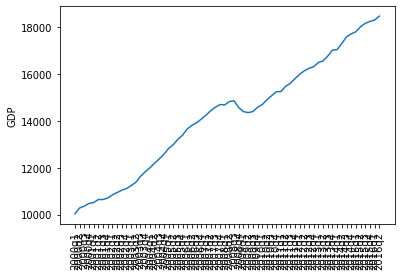

In [69]:
plt.plot(gdplev["Quarter"], gdplev.GDP)
plt.ylabel('GDP')
plt.xticks(gdplev["Quarter"], gdplev["Quarter"], rotation='vertical')
plt.show()

In [72]:
gdplev

,Quarter,GDP
0,2000q1,10031.0
1,2000q2,10278.3
2,2000q3,10357.4
3,2000q4,10472.3
4,2001q1,10508.1
5,2001q2,10638.4
6,2001q3,10639.5
7,2001q4,10701.3
8,2002q1,10834.4
9,2002q2,10934.8


In [162]:
gdplev["diff2"] = gdplev.GDP.diff() 

In [163]:
gdplev[gdplev.diff2 < 0 ]

,Quarter,GDP,diff2
32,2008q1,14668.4,-16.9
35,2008q4,14549.9,-293.1
36,2009q1,14383.9,-166.0
37,2009q2,14340.4,-43.5


In [164]:
def isRecession(x):
  return 1 if x > 0 else -1


In [165]:
gdplev["diff3"] = gdplev.diff2.apply( isRecession )

In [166]:
gdplev

,Quarter,GDP,diff2,diff3
0,2000q1,10031.0,NaN,-1
1,2000q2,10278.3,247.3,1
2,2000q3,10357.4,79.1,1
3,2000q4,10472.3,114.9,1
4,2001q1,10508.1,35.8,1
5,2001q2,10638.4,130.3,1
6,2001q3,10639.5,1.1,1
7,2001q4,10701.3,61.8,1
8,2002q1,10834.4,133.1,1
9,2002q2,10934.8,100.4,1


In [167]:
gdplev["recession"] = gdplev.diff3.rolling(2).sum()

In [78]:
gdplev

,Quarter,GDP,diff2,diff3,recession
0,2000q1,10031.0,NaN,-1,NaN
1,2000q2,10278.3,247.3,1,0.0
2,2000q3,10357.4,79.1,1,2.0
3,2000q4,10472.3,114.9,1,2.0
4,2001q1,10508.1,35.8,1,2.0
5,2001q2,10638.4,130.3,1,2.0
6,2001q3,10639.5,1.1,1,2.0
7,2001q4,10701.3,61.8,1,2.0
8,2002q1,10834.4,133.1,1,2.0
9,2002q2,10934.8,100.4,1,2.0


In [ ]:
#gdplev.drop([ "diff3",	"recession",	"mark"], axis=1, inplace=True)

In [169]:
import matplotlib.pyplot as plt


In [ ]:
recession_start = []
for i in range(len(df) - 2):
  if ((df.iloc[i][1] > df.iloc[i+1][1]) & (df.iloc[i+1][1] > df.iloc[i+2][1])):
    recession_start.append(df.iloc[i][0])

In [79]:
rStart = gdplev.loc[gdplev.recession == -2].index[0] - 2
gdplev.iloc[rStart]["Quarter"]

'2008q3'

In [102]:
df2 = gdplev[rStart:]
rEnd = df2.loc[df2.recession == 2].index[1]
gdplev.iloc[rEnd]["Quarter"]

'2009q4'

In [117]:
rStart = gdplev.loc[gdplev.recession == -2].index[0] - 1
df2 = gdplev[rStart:]
rBottom = df2.loc[df2.diff3 == 1].index[0] - 1
gdplev.iloc[rBottom]["Quarter"] 

'2009q2'

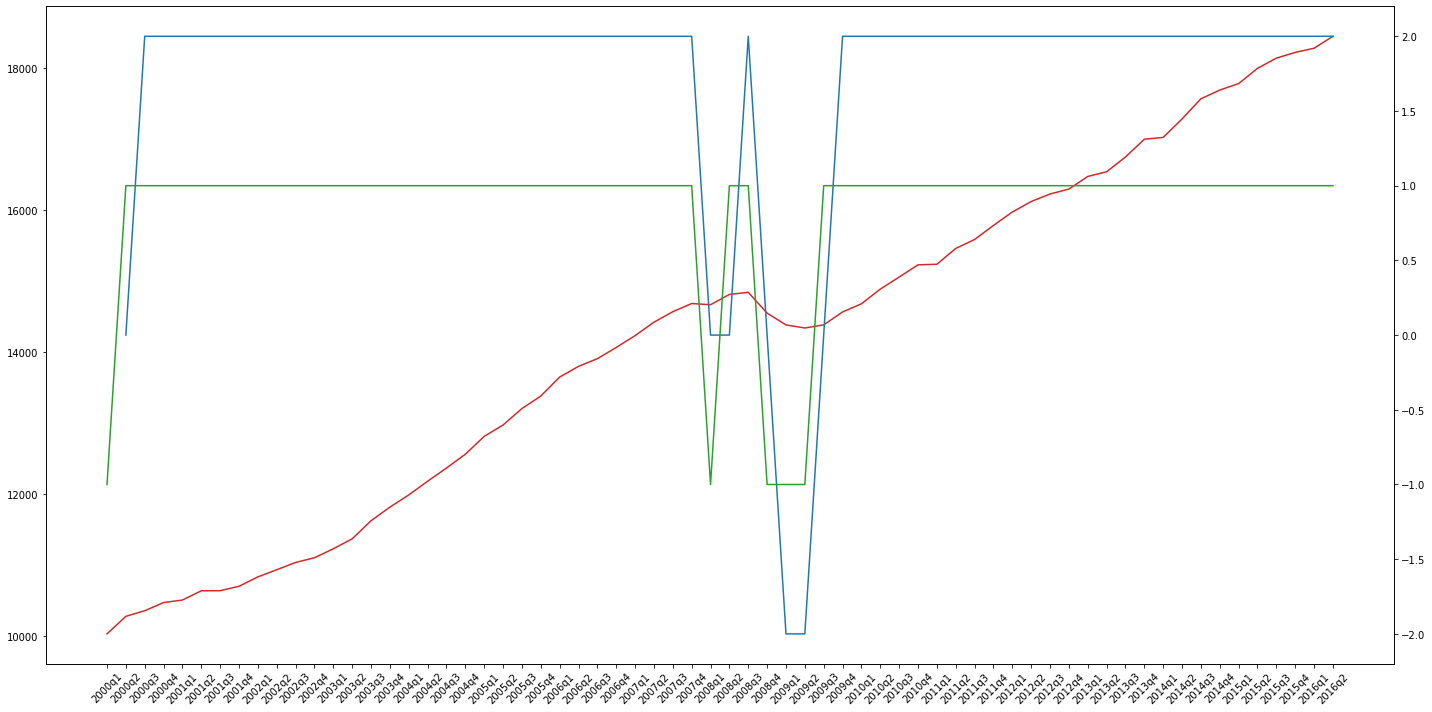

In [170]:
plt.rcParams['figure.figsize'] = [20, 10]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(gdplev["Quarter"], gdplev.GDP, color=color, label='GDP')
ax1.set_xticklabels(gdplev["Quarter"], rotation=45)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.plot(gdplev["Quarter"], gdplev.recession, color=color, label='Rolling Mean')
color = 'tab:green'
ax2.plot(gdplev["Quarter"], gdplev.diff3, color=color, label='Rolling Mean')
#plt.xticks(gdplev["Quarter"], gdplev["Quarter"], rotation='vertical')

fig.tight_layout() 
plt.show()

,Quarter,GDP,rMean,diff2
32,2008q1,14668.4,14586.425,-16.9
35,2008q4,14549.9,14718.575,-293.1
36,2009q1,14383.9,14647.450,-166.0
37,2009q2,14340.4,14529.300,-43.5


In [ ]:
?gdplev.rolling

In [171]:
def get_recession_start():
    '''Returns the year and quarter of the recession start time as a 
    string value in a format such as 2005q3'''
    # if you find a (first) -2 on gdplev.recession, the recession started at that index -2 
    rStart = gdplev.loc[gdplev.recession == -2].index[0] - 2
    return gdplev.iloc[rStart]["Quarter"] 
        
get_recession_start()

'2008q3'

In [172]:
def get_recession_end():
    '''Returns the year and quarter of the recession end time as a 
    string value in a format such as 2005q3'''
    rStart = gdplev.loc[gdplev.recession == -2].index[0] - 2
    df2 = gdplev[rStart:]
    rEnd = df2.loc[df2.recession == 2].index[1]
    return gdplev.iloc[rEnd]["Quarter"]

get_recession_end()

'2009q4'

In [173]:
def get_recession_bottom():
    '''Returns the year and quarter of the recession bottom time as a 
    string value in a format such as 2005q3'''
    rStart = gdplev.loc[gdplev.recession == -2].index[0] - 1
    df2 = gdplev[rStart:]
    rBottom = df2.loc[df2.diff3 == 1 ].index[0] - 1
    return gdplev.iloc[rBottom]["Quarter"] 

get_recession_bottom()

'2009q2'

In [120]:
!ls

City_Zhvi_AllHomes.csv	grades.csv   university_towns.txt
gdplev.xls		sample_data


In [60]:
df = pd.read_csv("City_Zhvi_AllHomes.csv")
df

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,...,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,6181,New York,NY,New York,Queens,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,472100,474300,477600,481400,485100,488800,492600,495900,499500,503500,506400,509900,515700,520800,522200,522400,523800,526200,528400,529600,530800,532200,533800,536200,540600,545600,551400,557200,563000,568700,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,155000.0,154600.0,154400.0,154200.0,154100.0,154300.0,154300.0,154200.0,154800.0,155900.0,157000.0,157700.0,158200.0,158600.0,158800.0,158900.0,159100.0,159800.0,160700.0,161900.0,163400.0,165400.0,167000.0,168500.0,169900.0,171400.0,172900.0,174300.0,175800.0,177800.0,180100.0,182600.0,184400.0,185600.0,...,432700,440400,448100,455200,461900,467800,472300,475700,479400,484000,489400,494200,498100,501800,505600,509000,512600,516000,518900,521700,525100,528900,532400,535300,538200,541000,544000,547200,550600,554200,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
2,17426,Chicago,IL,Chicago,Cook,3,109700.0,109400.0,109300.0,109300.0,109100.0,109000.0,109000.0,109600.0,110200.0,110800.0,111300.0,111700.0,112200.0,112300.0,112100.0,112200.0,113000.0,113700.0,114200.0,114800.0,115500.0,116200.0,117100.0,117600.0,117800.0,118300.0,119200.0,120000.0,120600.0,121500.0,122300.0,122700.0,122900.0,123300.0,...,172400,175100,178200,181000,183200,184600,185800,187200,189100,191100,192500,192600,192400,192900,193900,195600,197800,200100,201700,202000,201200,200500,201500,204000,206500,207600,207700,208100,209100,209000,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,4,50000.0,49900.0,49600.0,49400.0,49400.0,49300.0,49300.0,49400.0,49700.0,49600.0,49500.0,49700.0,49800.0,49700.0,49700.0,49800.0,49700.0,49700.0,49800.0,49900.0,49900.0,50000.0,50300.0,50600.0,50800.0,50800.0,50800.0,50800.0,50700.0,50500.0,50500.0,50700.0,50700.0,50800.0,...,111800,111200,111000,110900,111100,111800,112700,112900,113100,113900,114200,113600,113500,114100,114900,115500,115500,115400,115600,116000,116100,116100,116400,117000,117900,119000,120100,121300,122300,122700,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
4,40326,Phoenix,AZ,Phoenix,Maricopa,5,87200.0,87700.0,88200.0,88400.0,88500.0,88900.0,89400.0,89700.0,90100.0,90700.0,91400.0,91700.0,91800.0,92000.0,92300.0,92600.0,93000.0,93400.0,94000.0,94600.0,95300.0,96100.0,96800.0,97300.0,97700.0,98400.0,99200.0,100100.0,100500.0,100700.0,100900.0,101700.0,102600.0,103400.0,...,144700,147400,150500,153600,156100,158100,160000,161600,162700,163300,163700,164100,164200,164500,164700,165200,166200,167200,168400,169900,171000,171500,172100,172900,174100,175500,177100,179100,181000,182400,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,398292,Town of Wrightstown,WI,Green Bay,Brown,10726,NaN,NaN,NaN,NaN,N

In [12]:
df.columns

Index(['RegionID', 'RegionName', 'State', 'Metro', 'CountyName', 'SizeRank',
       '1996-04', '1996-05', '1996-06', '1996-07',
       ...
       '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04',
       '2016-05', '2016-06', '2016-07', '2016-08'],
      dtype='object', length=251)

In [40]:
df.columns[:6]

Index(['RegionID', 'RegionName', 'State', 'Metro', 'CountyName', 'SizeRank'], dtype='object')

In [13]:
df.columns[6:]

Index(['1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09',
       '1996-10', '1996-11', '1996-12', '1997-01',
       ...
       '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04',
       '2016-05', '2016-06', '2016-07', '2016-08'],
      dtype='object', length=245)

A quarter is a specific three month period, Q1 is January through March, Q2 is April through June, Q3 is July through September, Q4 is October through December.

In [27]:
d = {
'01' : ['q1'], 
'02' : ['q1'], 
'03' : ['q1'], 
'04' : ['q2'], 
'05' : ['q2'], 
'06' : ['q2'],
'07' : ['q3'], 
'08' : ['q3'], 
'09' : ['q3'],
'10' : ['q4'], 
'11' : ['q4'], 
'12' : ['q4']
}

qDF = pd.DataFrame(data=d, index = ['Quarter']).transpose()
qDF

,Quarter
01,q1
02,q1
03,q1
04,q2
05,q2
06,q2
07,q3
08,q3
09,q3
10,q4


In [174]:
def monthToQtr(month):
  (yearStr, monthStr) = month.split('-')
  return yearStr + qDF.loc[monthStr, 'Quarter']



In [39]:
monthToQtr('1996-04')

'1996q2'

In [42]:
dir(df.columns[6:])

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__inv__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmul__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_accessors',
 '_add_comparison_methods',
 '_add_logical_methods',
 '_add_logical_methods_disabled',
 '_add_numeric_methods

In [47]:
quarterStrings = df.columns[6:].to_series().apply(monthToQtr)
quarterStrings.to_list()

['1996q2',
 '1996q2',
 '1996q2',
 '1996q3',
 '1996q3',
 '1996q3',
 '1996q4',
 '1996q4',
 '1996q4',
 '1997q1',
 '1997q1',
 '1997q1',
 '1997q2',
 '1997q2',
 '1997q2',
 '1997q3',
 '1997q3',
 '1997q3',
 '1997q4',
 '1997q4',
 '1997q4',
 '1998q1',
 '1998q1',
 '1998q1',
 '1998q2',
 '1998q2',
 '1998q2',
 '1998q3',
 '1998q3',
 '1998q3',
 '1998q4',
 '1998q4',
 '1998q4',
 '1999q1',
 '1999q1',
 '1999q1',
 '1999q2',
 '1999q2',
 '1999q2',
 '1999q3',
 '1999q3',
 '1999q3',
 '1999q4',
 '1999q4',
 '1999q4',
 '2000q1',
 '2000q1',
 '2000q1',
 '2000q2',
 '2000q2',
 '2000q2',
 '2000q3',
 '2000q3',
 '2000q3',
 '2000q4',
 '2000q4',
 '2000q4',
 '2001q1',
 '2001q1',
 '2001q1',
 '2001q2',
 '2001q2',
 '2001q2',
 '2001q3',
 '2001q3',
 '2001q3',
 '2001q4',
 '2001q4',
 '2001q4',
 '2002q1',
 '2002q1',
 '2002q1',
 '2002q2',
 '2002q2',
 '2002q2',
 '2002q3',
 '2002q3',
 '2002q3',
 '2002q4',
 '2002q4',
 '2002q4',
 '2003q1',
 '2003q1',
 '2003q1',
 '2003q2',
 '2003q2',
 '2003q2',
 '2003q3',
 '2003q3',
 '2003q3',
 '2003q4',

In [58]:
#newColumns = df.columns[:6].append( quarterStrings.to_list() )
#newColumns
indices1 = df.columns[:6].to_list()
indices2 = quarterStrings.to_list()
df.columns = indices1 + indices2

In [97]:
df

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,...,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,6181,New York,NY,New York,Queens,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,472100,474300,477600,481400,485100,488800,492600,495900,499500,503500,506400,509900,515700,520800,522200,522400,523800,526200,528400,529600,530800,532200,533800,536200,540600,545600,551400,557200,563000,568700,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,155000.0,154600.0,154400.0,154200.0,154100.0,154300.0,154300.0,154200.0,154800.0,155900.0,157000.0,157700.0,158200.0,158600.0,158800.0,158900.0,159100.0,159800.0,160700.0,161900.0,163400.0,165400.0,167000.0,168500.0,169900.0,171400.0,172900.0,174300.0,175800.0,177800.0,180100.0,182600.0,184400.0,185600.0,...,432700,440400,448100,455200,461900,467800,472300,475700,479400,484000,489400,494200,498100,501800,505600,509000,512600,516000,518900,521700,525100,528900,532400,535300,538200,541000,544000,547200,550600,554200,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
2,17426,Chicago,IL,Chicago,Cook,3,109700.0,109400.0,109300.0,109300.0,109100.0,109000.0,109000.0,109600.0,110200.0,110800.0,111300.0,111700.0,112200.0,112300.0,112100.0,112200.0,113000.0,113700.0,114200.0,114800.0,115500.0,116200.0,117100.0,117600.0,117800.0,118300.0,119200.0,120000.0,120600.0,121500.0,122300.0,122700.0,122900.0,123300.0,...,172400,175100,178200,181000,183200,184600,185800,187200,189100,191100,192500,192600,192400,192900,193900,195600,197800,200100,201700,202000,201200,200500,201500,204000,206500,207600,207700,208100,209100,209000,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,4,50000.0,49900.0,49600.0,49400.0,49400.0,49300.0,49300.0,49400.0,49700.0,49600.0,49500.0,49700.0,49800.0,49700.0,49700.0,49800.0,49700.0,49700.0,49800.0,49900.0,49900.0,50000.0,50300.0,50600.0,50800.0,50800.0,50800.0,50800.0,50700.0,50500.0,50500.0,50700.0,50700.0,50800.0,...,111800,111200,111000,110900,111100,111800,112700,112900,113100,113900,114200,113600,113500,114100,114900,115500,115500,115400,115600,116000,116100,116100,116400,117000,117900,119000,120100,121300,122300,122700,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
4,40326,Phoenix,AZ,Phoenix,Maricopa,5,87200.0,87700.0,88200.0,88400.0,88500.0,88900.0,89400.0,89700.0,90100.0,90700.0,91400.0,91700.0,91800.0,92000.0,92300.0,92600.0,93000.0,93400.0,94000.0,94600.0,95300.0,96100.0,96800.0,97300.0,97700.0,98400.0,99200.0,100100.0,100500.0,100700.0,100900.0,101700.0,102600.0,103400.0,...,144700,147400,150500,153600,156100,158100,160000,161600,162700,163300,163700,164100,164200,164500,164700,165200,166200,167200,168400,169900,171000,171500,172100,172900,174100,175500,177100,179100,181000,182400,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,398292,Town of Wrightstown,WI,Green Bay,Brown,10726,NaN,NaN,NaN,NaN,N

In [115]:
dfQtrData = df.loc[:,'2000-01':].transpose()

In [116]:
dfQtrData

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,10690,10691,10692,10693,10694,10695,10696,10697,10698,10699,10700,10701,10702,10703,10704,10705,10706,10707,10708,10709,10710,10711,10712,10713,10714,10715,10716,10717,10718,10719,10720,10721,10722,10723,10724,10725,10726,10727,10728,10729
2000-01,NaN,204400.0,136800.0,52700.0,111000.0,131700.0,219200.0,85100.0,364100.0,88000.0,418700.0,142500.0,64400.0,93800.0,72400.0,126600.0,75900.0,203100.0,246100.0,59300.0,160600.0,136200.0,113100.0,77600.0,101500.0,152300.0,76000.0,112400.0,125300.0,93300.0,121100.0,119000.0,195500.0,119100.0,118800.0,144500.0,142300.0,121800.0,199700.0,73500.0,...,NaN,131500.0,97900.0,NaN,80300.0,157000.0,94800.0,126700.0,152100.0,89000.0,NaN,155300.0,NaN,106700.0,131600.0,160000.0,NaN,54800.0,106800.0,96800.0,1222500.0,98500.0,NaN,157400.0,63600.0,39000.0,91300.0,NaN,148200.0,NaN,114200.0,106600.0,127800.0,171300.0,35500.0,101100.0,77600.0,113900.0,148000.0,150800.0
2000-02,NaN,207000.0,138300.0,53100.0,111700.0,132600.0,222900.0,84500.0,374000.0,88800.0,430600.0,143000.0,66200.0,94400.0,72500.0,126900.0,76300.0,206900.0,248800.0,59700.0,162200.0,137900.0,113900.0,78100.0,101900.0,152800.0,76400.0,112800.0,125800.0,94300.0,122500.0,119700.0,198300.0,120200.0,119400.0,145200.0,143700.0,123100.0,204800.0,73800.0,...,NaN,132500.0,98200.0,NaN,80000.0,156900.0,95600.0,127800.0,154800.0,89800.0,NaN,156200.0,NaN,105600.0,133100.0,161800.0,NaN,56800.0,107300.0,97000.0,1240300.0,97400.0,NaN,159400.0,63500.0,40200.0,91800.0,NaN,148400.0,NaN,113300.0,108400.0,128600.0,173700.0,35500.0,101500.0,79400.0,114000.0,151200.0,151000.0
2000-03,NaN,209800.0,140100.0,53200.0,112800.0,133500.0,226600.0,83800.0,384700.0,89000.0,442200.0,143400.0,67900.0,94900.0,72600.0,127300.0,76600.0,210800.0,250900.0,60000.0,163900.0,139200.0,114500.0,78400.0,102100.0,153300.0,76900.0,113200.0,126500.0,94700.0,123700.0,120200.0,200900.0,121400.0,120000.0,146100.0,144700.0,123100.0,210700.0,74300.0,...,NaN,133900.0,98500.0,NaN,79700.0,157400.0,95800.0,128300.0,156700.0,89100.0,NaN,155500.0,NaN,105900.0,134000.0,163700.0,NaN,59900.0,107700.0,98300.0,1230100.0,100200.0,NaN,160700.0,63700.0,40800.0,92000.0,NaN,147600.0,NaN,113100.0,108400.0,129300.0,176900.0,35200.0,102700.0,80600.0,115800.0,153800.0,151300.0
2000-04,NaN,212300.0,141900.0,53400.0,113700.0,134100.0,230200.0,83600.0,395700.0,88900.0,453600.0,143900.0,68900.0,95400.0,72900.0,127800.0,76900.0,214700.0,252900.0,59800.0,165800.0,140900.0,115000.0,78600.0,102500.0,153800.0,77200.0,113400.0,126700.0,94800.0,124800.0,120700.0,202800.0,122600.0,120500.0,147200.0,146000.0,122700.0,216700.0,74800.0,...,NaN,134900.0,98700.0,NaN,80100.0,159300.0,95800.0,128900.0,158800.0,88100.0,NaN,154300.0,NaN,105500.0,134700.0,166300.0,NaN,62500.0,107400.0,99800.0,1221900.0,103700.0,NaN,160900.0,64200.0,41100.0,91500.0,NaN,146700.0,NaN,114000.0,107500.0,130100.0,180500.0,35200.0,103700.0,80200.0,117600.0,155600.0,151000.0
2000-05,NaN,214500.0,143700.0,53700.0,114300.0,134400.0,234400.0,83800.0,407100.0,89600.0,465200.0,145000.0,68600.0,95800.0,73200.0,128300.0,77000.0,218900.0,255500.0,59400.0,167800.0,144200.0,115400.0,79000.0,103000.0,154700.0,77500.0,114000.0,126700.0,95200.0,126000.0,121100.0,204700.0,124400.0,121100.0,148100.0,148000.0,122900.0,223300.0,75200.0,...,NaN,136300.0,99000.0,NaN,80300.0,160700.0,95600.0,130000.0,161900.0,87700.0,NaN,154900.0,NaN,104200.0,135800.0,169400.0,NaN,64500.0,107600.0,100300.0,1231300.0,105200.0,NaN,161000.0,64500.0,41500.0,91700.0,NaN,147300.0,NaN,114700.0,106400.0,130700.0,183400.0,35500.0,105200.0,81000.0,119100.0,156000.0,150200.0
2000-06,NaN,216600.0,145300.0,53800.0,115100.0,134600.0,238500.0,84200.0,416900.0,90600.0,474600.0,146900.0,67400.0,96300.0,73500.0,129000.0,76700.0,223900.0,258400.0,59300.0,169900.0,147500.0,115400.0,79600.0,103400.0,155800.0,77800.0,114900.0,126700.0,95800.0,127200.0,121500.0,207000.0,125900.0,121700.0,148900.0,14990

In [117]:
dfQtrData['quarter'] = dfQtrData.index.to_series().apply(monthToQtr).to_list()

In [118]:
quarterlyAgeraged = dfQtrData.groupby('quarter').mean()

In [119]:
quarterlyAgeraged.T

quarter,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,2002q3,2002q4,2003q1,2003q2,2003q3,2003q4,2004q1,2004q2,2004q3,2004q4,2005q1,2005q2,2005q3,2005q4,2006q1,2006q2,2006q3,2006q4,2007q1,2007q2,2007q3,2007q4,2008q1,2008q2,2008q3,2008q4,2009q1,2009q2,2009q3,2009q4,2010q1,2010q2,2010q3,2010q4,2011q1,2011q2,2011q3,2011q4,2012q1,2012q2,2012q3,2012q4,2013q1,2013q2,2013q3,2013q4,2014q1,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,435650.000000,432133.333333,422666.666667,431800.000000,438766.666667,464500.000000,488133.333333,513700.000000,520033.333333,524700.000000,517233.333333,514666.666667,510200.000000,513366.666667,508500.000000,503933.333333,499766.666667,487933.333333,477733.333333,465833.333333,455933.333333,458366.666667,469700.000000,476933.333333,478566.666667,477266.666667,476700.000000,472133.333333,469200.000000,463700.000000,460200.000000,462700.000000,467233.333333,469166.666667,469033.333333,472233.333333,481366.666667,492433.333333,503133.333333,515466.666667,522800.000000,528066.666667,532266.666667,540800.000000,557200.000000,572833.333333,582866.666667,591633.333333,587200.0
1,207066.666667,214466.666667,220966.666667,226166.666667,233000.000000,239100.000000,245066.666667,253033.333333,261966.666667,272700.000000,287000.000000,302233.333333,318900.000000,334500.000000,350633.333333,370833.333333,395233.333333,425566.666667,456166.666667,477366.666667,495066.666667,518400.000000,545566.666667,571066.666667,581766.666667,587500.000000,592966.666667,592533.333333,591766.666667,589500.000000,577300.000000,561366.666667,535300.000000,502266.666667,469500.000000,443966.666667,426266.666667,413900.000000,406366.666667,404333.333333,413366.666667,411166.666667,406766.666667,402066.666667,397100.000000,390100.000000,382100.000000,375566.666667,370600.000000,375333.333333,385566.666667,396566.666667,411533.333333,432866.666667,455066.666667,471933.333333,484266.666667,498033.333333,509066.666667,518866.666667,528800.000000,538166.666667,547266.666667,557733.333333,566033.333333,577466.666667,584050.0
2,138400.000000,143633.333333,147866.666667,152133.333333,156933.333333,161800.000000,166400.000000,170433.333333,175500.000000,177566.666667,178966.666667,183700.000000,187100.000000,194300.000000,202066.666667,204133.333333,206200.000000,208600.000000,212766.666667,218333.333333,223900.000000,228533.333333,233166.666667,237500.000000,242400.000000,245200.000000,245700.000000,246700.000000,247233.333333,246400.000000,246266.666667,246833.333333,243733.333333,237900.000000,232000.000000,227033.333333,223766.666667,219700.000000,214100.000000,211666.666667,207300.000000,203800.000000,198933.333333,191366.666667,187400.000000,181600.000000,174266.666667,170200.000000,166933.333333,167033.333333,168133.333333,167233.333333,168366.666667,172633.333333,180800.000000,185866.666667,190900.000000,192633.333333,195766.666667,201266.666667,201066.666667,206033.333333,208300.000000,207900.000000,206066.666667,208200.000000,212000.0
3,53000.000000,53633.333333,54133.333333,54700.000000,55333.333333,55533.333333,56266.666667,57533.333333,59133.333333,60733.333333,62166.666667,63500.000000,64733.333333,66200.000000,68466.666667,70733.333333,73733.333333,76733.333333,80566.666667,85533.333333,89700.000000,94866.666667,100166.666667,104900.000000,108333.333333,112366.666667,115466.666667,116633.333333,117333.333333,118700.000000,120833.333333,120800.000000,119566.666667,118133.333333,116933.333333,115866.666667,116200.000000,116166.666667,116733.333333,118566.666667,121166.666667,122800.000000,120166.666667,117766.666667,117100.000000,116300.000000,115466.666667,114700.000000,112733.333333,110533.333333,109933.333333,110833.333333,112000.000000,111733.333333,111000.000000,112466.666667,113733.333333,113733.333333,115300.000000,115666.666667,116200.000000,117966.666667,121233.333333,122200.000000,123433.333333,126933.3

In [121]:
preFinal = pd.concat( [ df.iloc[:,:6], quarterlyAgeraged.T] , axis=1)

In [125]:
preFinal.drop( ['RegionID', 'Metro', 'CountyName', 	'SizeRank'], inplace=True, axis=1	)

In [127]:
preFinal.replace(states, inplace=True)

In [128]:
preFinal

,RegionName,State,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,2002q3,2002q4,2003q1,2003q2,2003q3,2003q4,2004q1,2004q2,2004q3,2004q4,2005q1,2005q2,2005q3,2005q4,2006q1,2006q2,2006q3,2006q4,2007q1,2007q2,2007q3,2007q4,2008q1,2008q2,2008q3,2008q4,2009q1,2009q2,2009q3,2009q4,2010q1,2010q2,2010q3,2010q4,2011q1,2011q2,2011q3,2011q4,2012q1,2012q2,2012q3,2012q4,2013q1,2013q2,2013q3,2013q4,2014q1,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
0,New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,435650.000000,432133.333333,422666.666667,431800.000000,438766.666667,464500.000000,488133.333333,513700.000000,520033.333333,524700.000000,517233.333333,514666.666667,510200.000000,513366.666667,508500.000000,503933.333333,499766.666667,487933.333333,477733.333333,465833.333333,455933.333333,458366.666667,469700.000000,476933.333333,478566.666667,477266.666667,476700.000000,472133.333333,469200.000000,463700.000000,460200.000000,462700.000000,467233.333333,469166.666667,469033.333333,472233.333333,481366.666667,492433.333333,503133.333333,515466.666667,522800.000000,528066.666667,532266.666667,540800.000000,557200.000000,572833.333333,582866.666667,591633.333333,587200.0
1,Los Angeles,California,207066.666667,214466.666667,220966.666667,226166.666667,233000.000000,239100.000000,245066.666667,253033.333333,261966.666667,272700.000000,287000.000000,302233.333333,318900.000000,334500.000000,350633.333333,370833.333333,395233.333333,425566.666667,456166.666667,477366.666667,495066.666667,518400.000000,545566.666667,571066.666667,581766.666667,587500.000000,592966.666667,592533.333333,591766.666667,589500.000000,577300.000000,561366.666667,535300.000000,502266.666667,469500.000000,443966.666667,426266.666667,413900.000000,406366.666667,404333.333333,413366.666667,411166.666667,406766.666667,402066.666667,397100.000000,390100.000000,382100.000000,375566.666667,370600.000000,375333.333333,385566.666667,396566.666667,411533.333333,432866.666667,455066.666667,471933.333333,484266.666667,498033.333333,509066.666667,518866.666667,528800.000000,538166.666667,547266.666667,557733.333333,566033.333333,577466.666667,584050.0
2,Chicago,Illinois,138400.000000,143633.333333,147866.666667,152133.333333,156933.333333,161800.000000,166400.000000,170433.333333,175500.000000,177566.666667,178966.666667,183700.000000,187100.000000,194300.000000,202066.666667,204133.333333,206200.000000,208600.000000,212766.666667,218333.333333,223900.000000,228533.333333,233166.666667,237500.000000,242400.000000,245200.000000,245700.000000,246700.000000,247233.333333,246400.000000,246266.666667,246833.333333,243733.333333,237900.000000,232000.000000,227033.333333,223766.666667,219700.000000,214100.000000,211666.666667,207300.000000,203800.000000,198933.333333,191366.666667,187400.000000,181600.000000,174266.666667,170200.000000,166933.333333,167033.333333,168133.333333,167233.333333,168366.666667,172633.333333,180800.000000,185866.666667,190900.000000,192633.333333,195766.666667,201266.666667,201066.666667,206033.333333,208300.000000,207900.000000,206066.666667,208200.000000,212000.0
3,Philadelphia,Pennsylvania,53000.000000,53633.333333,54133.333333,54700.000000,55333.333333,55533.333333,56266.666667,57533.333333,59133.333333,60733.333333,62166.666667,63500.000000,64733.333333,66200.000000,68466.666667,70733.333333,73733.333333,76733.333333,80566.666667,85533.333333,89700.000000,94866.666667,100166.666667,104900.000000,108333.333333,112366.666667,115466.666667,116633.333333,117333.333333,118700.000000,120833.333333,120800.000000,119566.666667,118133.333333,116933.333333,115866.666667,116200.000000,116166.666667,116733.333333,118566.666667,121166.666667,122800.000000,120166.666667,117766.666667,117100.000000,116300.000000,115466.666667,114700.000000,112733.333333,110533.333333,109933.333333,110833.333333,112000.000000,111733.333333,111000.000000,112466.666667,113733.333333,113733.333333,115300.00000

In [139]:
regions = preFinal['RegionName'].drop_duplicates().to_list()

In [140]:
states = preFinal['State'].drop_duplicates().to_list()

In [141]:
preFinal.set_index(['RegionName', 'State'])

,,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,2002q3,2002q4,2003q1,2003q2,2003q3,2003q4,2004q1,2004q2,2004q3,2004q4,2005q1,2005q2,2005q3,2005q4,2006q1,2006q2,2006q3,2006q4,2007q1,2007q2,2007q3,2007q4,2008q1,2008q2,2008q3,2008q4,2009q1,2009q2,2009q3,2009q4,2010q1,2010q2,2010q3,2010q4,2011q1,2011q2,2011q3,2011q4,2012q1,2012q2,2012q3,2012q4,2013q1,2013q2,2013q3,2013q4,2014q1,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
RegionName,State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,435650.000000,432133.333333,422666.666667,431800.000000,438766.666667,464500.000000,488133.333333,513700.000000,520033.333333,524700.000000,517233.333333,514666.666667,510200.000000,513366.666667,508500.000000,503933.333333,499766.666667,487933.333333,477733.333333,465833.333333,455933.333333,458366.666667,469700.000000,476933.333333,478566.666667,477266.666667,476700.000000,472133.333333,469200.000000,463700.000000,460200.000000,462700.000000,467233.333333,469166.666667,469033.333333,472233.333333,481366.666667,492433.333333,503133.333333,515466.666667,522800.000000,528066.666667,532266.666667,540800.000000,557200.000000,572833.333333,582866.666667,591633.333333,587200.0
Los Angeles,California,207066.666667,214466.666667,220966.666667,226166.666667,233000.000000,239100.000000,245066.666667,253033.333333,261966.666667,272700.000000,287000.000000,302233.333333,318900.000000,334500.000000,350633.333333,370833.333333,395233.333333,425566.666667,456166.666667,477366.666667,495066.666667,518400.000000,545566.666667,571066.666667,581766.666667,587500.000000,592966.666667,592533.333333,591766.666667,589500.000000,577300.000000,561366.666667,535300.000000,502266.666667,469500.000000,443966.666667,426266.666667,413900.000000,406366.666667,404333.333333,413366.666667,411166.666667,406766.666667,402066.666667,397100.000000,390100.000000,382100.000000,375566.666667,370600.000000,375333.333333,385566.666667,396566.666667,411533.333333,432866.666667,455066.666667,471933.333333,484266.666667,498033.333333,509066.666667,518866.666667,528800.000000,538166.666667,547266.666667,557733.333333,566033.333333,577466.666667,584050.0
Chicago,Illinois,138400.000000,143633.333333,147866.666667,152133.333333,156933.333333,161800.000000,166400.000000,170433.333333,175500.000000,177566.666667,178966.666667,183700.000000,187100.000000,194300.000000,202066.666667,204133.333333,206200.000000,208600.000000,212766.666667,218333.333333,223900.000000,228533.333333,233166.666667,237500.000000,242400.000000,245200.000000,245700.000000,246700.000000,247233.333333,246400.000000,246266.666667,246833.333333,243733.333333,237900.000000,232000.000000,227033.333333,223766.666667,219700.000000,214100.000000,211666.666667,207300.000000,203800.000000,198933.333333,191366.666667,187400.000000,181600.000000,174266.666667,170200.000000,166933.333333,167033.333333,168133.333333,167233.333333,168366.666667,172633.333333,180800.000000,185866.666667,190900.000000,192633.333333,195766.666667,201266.666667,201066.666667,206033.333333,208300.000000,207900.000000,206066.666667,208200.000000,212000.0
Philadelphia,Pennsylvania,53000.000000,53633.333333,54133.333333,54700.000000,55333.333333,55533.333333,56266.666667,57533.333333,59133.333333,60733.333333,62166.666667,63500.000000,64733.333333,66200.000000,68466.666667,70733.333333,73733.333333,76733.333333,80566.666667,85533.333333,89700.000000,94866.666667,100166.666667,104900.000000,108333.333333,112366.666667,115466.666667,116633.333333,117333.333333,118700.000000,120833.333333,120800.000000,119566.666667,118133.333333,116933.333333,115866.666667,116200.000000,116166.666667,116733.333333,118566.666667,121166.666667,122800.000000,120166.666667,117766.666667,117100.000000,116300.000000,115466.666667,114700.000000,112733.333333,110533.333333,109933.333333,110833.333333,112000.000000,111733.333333,111000.0

In [175]:
# Use this dictionary to map state names to two letter acronyms
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}

In [176]:
def monthToQtr(month):
  (yearStr, monthStr) = month.split('-')
  return yearStr + qDF.loc[monthStr, 'Quarter']

def convert_housing_data_to_quarters():
    '''Converts the housing data to quarters and returns it as mean 
    values in a dataframe. This dataframe should be a dataframe with
    columns for 2000q1 through 2016q3, and should have a multi-index
    in the shape of ["State","RegionName"].
    
    Note: Quarters are defined in the assignment description, they are
    not arbitrary three month periods.
    
    The resulting dataframe should have 67 columns, and 10,730 rows.
    '''
    df = pd.read_csv("City_Zhvi_AllHomes.csv")
    dfQtrData = df.loc[:,'2000-01':].transpose()
    dfQtrData['quarter'] = dfQtrData.index.to_series().apply(monthToQtr).to_list()
    quarterlyAgeraged = dfQtrData.groupby('quarter').mean()
    preFinal = pd.concat( [ df.iloc[:,:6], quarterlyAgeraged.T] , axis=1)
    preFinal.drop( ['RegionID', 'Metro', 'CountyName', 	'SizeRank'], inplace=True, axis=1	)
    preFinal.replace(states, inplace=True)
    preFinal.set_index(['RegionName', 'State'], inplace=True)
    return preFinal

convert_housing_data_to_quarters()


,,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,2002q3,2002q4,2003q1,2003q2,2003q3,2003q4,2004q1,2004q2,2004q3,2004q4,2005q1,2005q2,2005q3,2005q4,2006q1,2006q2,2006q3,2006q4,2007q1,2007q2,2007q3,2007q4,2008q1,2008q2,2008q3,2008q4,2009q1,2009q2,2009q3,2009q4,2010q1,2010q2,2010q3,2010q4,2011q1,2011q2,2011q3,2011q4,2012q1,2012q2,2012q3,2012q4,2013q1,2013q2,2013q3,2013q4,2014q1,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
RegionName,State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,435650.000000,432133.333333,422666.666667,431800.000000,438766.666667,464500.000000,488133.333333,513700.000000,520033.333333,524700.000000,517233.333333,514666.666667,510200.000000,513366.666667,508500.000000,503933.333333,499766.666667,487933.333333,477733.333333,465833.333333,455933.333333,458366.666667,469700.000000,476933.333333,478566.666667,477266.666667,476700.000000,472133.333333,469200.000000,463700.000000,460200.000000,462700.000000,467233.333333,469166.666667,469033.333333,472233.333333,481366.666667,492433.333333,503133.333333,515466.666667,522800.000000,528066.666667,532266.666667,540800.000000,557200.000000,572833.333333,582866.666667,591633.333333,587200.0
Los Angeles,California,207066.666667,214466.666667,220966.666667,226166.666667,233000.000000,239100.000000,245066.666667,253033.333333,261966.666667,272700.000000,287000.000000,302233.333333,318900.000000,334500.000000,350633.333333,370833.333333,395233.333333,425566.666667,456166.666667,477366.666667,495066.666667,518400.000000,545566.666667,571066.666667,581766.666667,587500.000000,592966.666667,592533.333333,591766.666667,589500.000000,577300.000000,561366.666667,535300.000000,502266.666667,469500.000000,443966.666667,426266.666667,413900.000000,406366.666667,404333.333333,413366.666667,411166.666667,406766.666667,402066.666667,397100.000000,390100.000000,382100.000000,375566.666667,370600.000000,375333.333333,385566.666667,396566.666667,411533.333333,432866.666667,455066.666667,471933.333333,484266.666667,498033.333333,509066.666667,518866.666667,528800.000000,538166.666667,547266.666667,557733.333333,566033.333333,577466.666667,584050.0
Chicago,Illinois,138400.000000,143633.333333,147866.666667,152133.333333,156933.333333,161800.000000,166400.000000,170433.333333,175500.000000,177566.666667,178966.666667,183700.000000,187100.000000,194300.000000,202066.666667,204133.333333,206200.000000,208600.000000,212766.666667,218333.333333,223900.000000,228533.333333,233166.666667,237500.000000,242400.000000,245200.000000,245700.000000,246700.000000,247233.333333,246400.000000,246266.666667,246833.333333,243733.333333,237900.000000,232000.000000,227033.333333,223766.666667,219700.000000,214100.000000,211666.666667,207300.000000,203800.000000,198933.333333,191366.666667,187400.000000,181600.000000,174266.666667,170200.000000,166933.333333,167033.333333,168133.333333,167233.333333,168366.666667,172633.333333,180800.000000,185866.666667,190900.000000,192633.333333,195766.666667,201266.666667,201066.666667,206033.333333,208300.000000,207900.000000,206066.666667,208200.000000,212000.0
Philadelphia,Pennsylvania,53000.000000,53633.333333,54133.333333,54700.000000,55333.333333,55533.333333,56266.666667,57533.333333,59133.333333,60733.333333,62166.666667,63500.000000,64733.333333,66200.000000,68466.666667,70733.333333,73733.333333,76733.333333,80566.666667,85533.333333,89700.000000,94866.666667,100166.666667,104900.000000,108333.333333,112366.666667,115466.666667,116633.333333,117333.333333,118700.000000,120833.333333,120800.000000,119566.666667,118133.333333,116933.333333,115866.666667,116200.000000,116166.666667,116733.333333,118566.666667,121166.666667,122800.000000,120166.666667,117766.666667,117100.000000,116300.000000,115466.666667,114700.000000,112733.333333,110533.333333,109933.333333,110833.333333,112000.000000,111733.333333,111000.0

In [ ]:

def run_ttest():
    '''First creates new data showing the decline or growth of housing prices
    between the recession start and the recession bottom. Then runs a ttest
    comparing the university town values to the non-university towns values, 
    return whether the alternative hypothesis (that the two groups are the same)
    is true or not as well as the p-value of the confidence. 
    
    Return the tuple (different, p, better) where different=True if the t-test is
    True at a p<0.01 (we reject the null hypothesis), or different=False if 
    otherwise (we cannot reject the null hypothesis). The variable p should
    be equal to the exact p value returned from scipy.stats.ttest_ind(). The
    value for better should be either "university town" or "non-university town"
    depending on which has a lower mean price ratio (which is equivilent to a
    reduced market loss).
    
    H0 : 
    '''
 
    return
run_ttest()

(True, 6.75507893574613e-05, 'university town')